# Cyclum: hESC control

In [ ]:
# Add ../../ to path
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl

import cyclum.tuning
import cyclum.models
from cyclum import writer

from cyclum.hdfrw import hdf2mat, mat2hdf

Using TensorFlow backend.


In [3]:
df = hdf2mat('/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSM357649-regular.h5')

In [4]:
model = cyclum.tuning.CyclumAutoTune(df.values, max_linear_dims=3, 
                                     epochs=100, rate=2e-4, verbose=20,
                                     encoder_width=[30, 20])

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch: 20/100, loss:  0.4401, time elapsed:  61.68s, time left:  246.70s
epoch: 40/100, loss:  0.4398, time elapsed:  121.59s, time left:  182.39s
epoch: 60/100, loss:  0.4397, time elapsed:  182.36s, time left:  121.57s
epoch: 80/100, loss:  0.4396, time elapsed:  242.31s, time left:  60.58s
epoch: 100/100, loss:  0.4396, time elapsed:  302.47s, time left:  0.00s
[0.43962245452802207]
[0.4398806149220572, 0.4376879639094987, 0.4356532763301374, 0.433768576490514, 0.4326349964572587]
    1 linear dimensions...
epoch: 20/100, loss:  0.4382, time elapsed:  61.44s, time left:  245.76s
epoch: 40/100, loss:  0.4382, time elapsed:  122.78s, time left:  184.18s
epoch: 60/100, loss:  0.4381, time elapsed:  184.18s, time left:  122.78s
epoch: 80/100, loss:  0.4

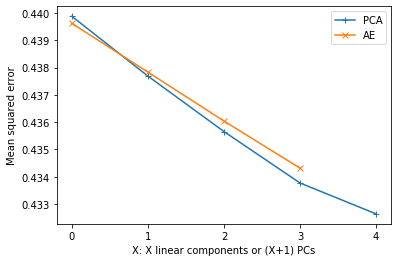

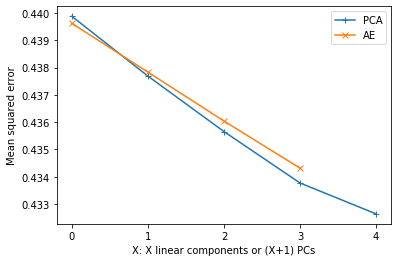

In [5]:
model.show_elbow()

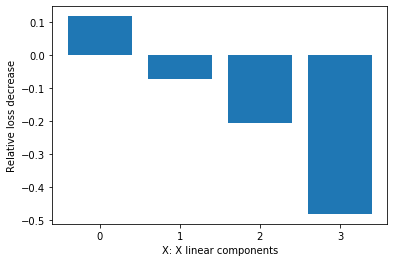

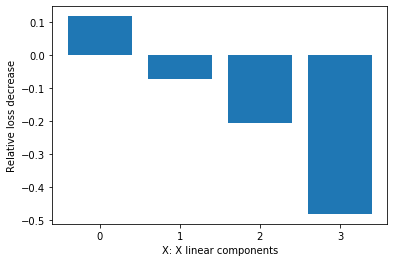

In [9]:
model.show_bar()

In [6]:
model.train(df.values, epochs=300, rate=1e-4, verbose=30)

pseudotime = model.predict_pseudotime(df.values)

epoch: 30/300, loss:  0.4399, time elapsed:  88.75s, time left:  798.73s
epoch: 60/300, loss:  0.4395, time elapsed:  177.04s, time left:  708.17s
epoch: 90/300, loss:  0.4394, time elapsed:  265.64s, time left:  619.82s
epoch: 120/300, loss:  0.4394, time elapsed:  354.24s, time left:  531.36s
epoch: 150/300, loss:  0.4394, time elapsed:  443.12s, time left:  443.12s
epoch: 180/300, loss:  0.4394, time elapsed:  532.11s, time left:  354.74s
epoch: 210/300, loss:  0.4393, time elapsed:  623.10s, time left:  267.04s
epoch: 240/300, loss:  0.4393, time elapsed:  716.16s, time left:  179.04s
epoch: 270/300, loss:  0.4393, time elapsed:  808.40s, time left:  89.82s
epoch: 300/300, loss:  0.4393, time elapsed:  899.24s, time left:  0.00s


In [7]:
import pickle as pkl
with open('hESC.pkl', 'wb') as file:
    pkl.dump(pseudotime, file)

In [8]:
from cyclum.hdfrw import hdf2mat, mat2hdf
import pickle as pkl
with open('hESC.pkl', 'rb') as file:
    pseudotime = pkl.load(file)

mat2hdf(pseudotime, "/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSM357649-pseudotime.h5")
mat2hdf(model.get_weight(), "/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSM357649-weight.h5")

